<a href="https://colab.research.google.com/github/Damola0204/hello-world/blob/master/Data_Structures_and_Algorithms_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Searching for: Beginning (1) (value = 1)
  Binary Search: Index 0, Time: 0.000013 sec
  Interpolation Search: Index 0, Time: 0.000003 sec
  Exponential Search: Index 0, Time: 0.000001 sec

Searching for: Middle (50000) (value = 50000)
  Binary Search: Index 49999, Time: 0.000001 sec
  Interpolation Search: Index 49999, Time: 0.000003 sec
  Exponential Search: Index 49999, Time: 0.000822 sec

Searching for: End (100000) (value = 100000)
  Binary Search: Index 99999, Time: 0.000010 sec
  Interpolation Search: Index 99999, Time: 0.000003 sec
  Exponential Search: Index 99999, Time: 0.000798 sec

Searching for: Random (value = 94505)
  Binary Search: Index 94504, Time: 0.000006 sec
  Interpolation Search: Index 94504, Time: 0.000002 sec
  Exponential Search: Index 94504, Time: 0.000594 sec


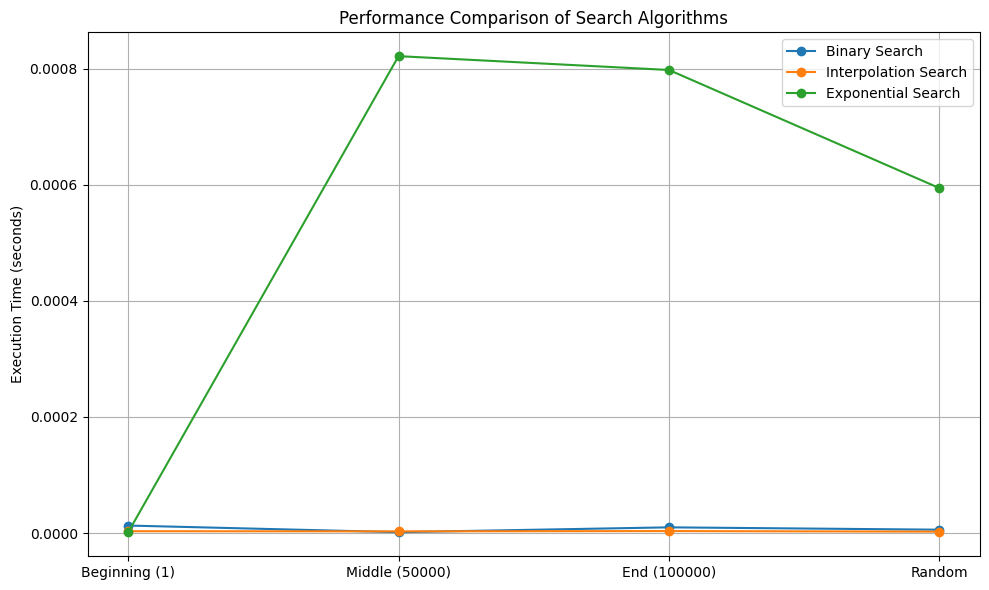

In [1]:
import time
import random
import matplotlib.pyplot as plt

# Step 1: Generate a large, sorted dataset (100,000 numbers)
data_size = 100000
sorted_data = list(range(1, data_size + 1))  # [1, 2, 3, ..., 100000]

# Step 2: Define Binary Search
def binary_search(dataset, target):
    low, high = 0, len(dataset) - 1
    while low <= high:
        mid = (low + high) // 2
        if dataset[mid] == target:
            return mid
        elif dataset[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Step 3: Define Interpolation Search
def interpolation_search(dataset, target):
    low, high = 0, len(dataset) - 1
    while low <= high and dataset[low] <= target <= dataset[high]:
        if low == high:
            return low if dataset[low] == target else -1
        # Estimate position
        pos = low + ((target - dataset[low]) * (high - low) // (dataset[high] - dataset[low]))
        if dataset[pos] == target:
            return pos
        elif dataset[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1

# Step 4: Define Exponential Search
def exponential_search(dataset, target):
    if dataset[0] == target:
        return 0
    index = 1
    while index < len(dataset) and dataset[index] <= target:
        index *= 2
    # Use binary search in the identified range
    return binary_search(dataset[:min(index, len(dataset))], target)

# Step 5: Function to measure execution time
def measure_time(search_func, dataset, target):
    start = time.time()
    index_found = search_func(dataset, target)
    end = time.time()
    return index_found, end - start

# Step 6: Select test targets
test_targets = {
    "Beginning (1)": 1,
    "Middle (50000)": data_size // 2,
    "End (100000)": data_size,
    "Random": random.randint(1, data_size)
}

# Step 7: Run searches and collect times
results = { "Binary Search": [], "Interpolation Search": [], "Exponential Search": [] }

for label, target in test_targets.items():
    print(f"\nSearching for: {label} (value = {target})")

    idx, t1 = measure_time(binary_search, sorted_data, target)
    print(f"  Binary Search: Index {idx}, Time: {t1:.6f} sec")
    results["Binary Search"].append(t1)

    idx, t2 = measure_time(interpolation_search, sorted_data, target)
    print(f"  Interpolation Search: Index {idx}, Time: {t2:.6f} sec")
    results["Interpolation Search"].append(t2)

    idx, t3 = measure_time(exponential_search, sorted_data, target)
    print(f"  Exponential Search: Index {idx}, Time: {t3:.6f} sec")
    results["Exponential Search"].append(t3)

# Step 8: Plot the results
labels = list(test_targets.keys())
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.plot(x, results["Binary Search"], marker='o', label='Binary Search')
plt.plot(x, results["Interpolation Search"], marker='o', label='Interpolation Search')
plt.plot(x, results["Exponential Search"], marker='o', label='Exponential Search')

plt.xticks(x, labels)
plt.ylabel("Execution Time (seconds)")
plt.title("Performance Comparison of Search Algorithms")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
